<a href="https://colab.research.google.com/github/Pratham-112/GBM-RandomWalk/blob/main/GeometricBrownianMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

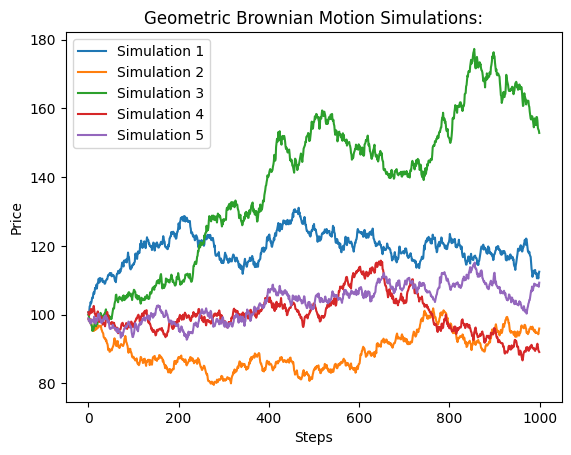

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_steps = 1000
n_simulations = 5
start_price = 100
mu=0.05
drift=0.2
time=1
dT=time/n_steps
for i in range(n_simulations):
    Z=np.random.normal(0,1,n_steps)
    increments=(mu-(0.5*(drift**2)))*dT+(drift*np.sqrt(dT)*Z)
    log_path=np.cumsum(increments)
    path=start_price*np.exp(log_path)
    plt.plot(path, label=f"Simulation {i+1}")
plt.title("Geometric Brownian Motion Simulations:")
plt.xlabel("Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv("/content/NIFTY50.csv")
print(df.head())

         Date      Open      High       Low     Close   Shares Traded   \
0  18-SEP-2024  25402.40  25482.20  25285.55  25377.55       215727159   
1  19-SEP-2024  25487.05  25611.95  25376.05  25415.80       314461263   
2  20-SEP-2024  25525.95  25849.25  25426.60  25790.95       533067422   
3  23-SEP-2024  25872.55  25956.00  25847.35  25939.05       209187756   
4  24-SEP-2024  25921.45  26011.55  25886.85  25940.40       384115033   

   Turnover (₹ Cr)  
0         28832.00  
1         34389.27  
2         68915.27  
3         24825.74  
4         35573.63  


In [ ]:
prices = df['Close ']
dates = df['Date ']
log_ret = np.log(prices / prices.shift(1)).dropna()
mu_daily = log_ret.mean()
sigma_daily = log_ret.std(ddof=1)
trading_days_per_year = 252
mu_annual = mu_daily * trading_days_per_year
sigma_annual = sigma_daily * np.sqrt(trading_days_per_year)

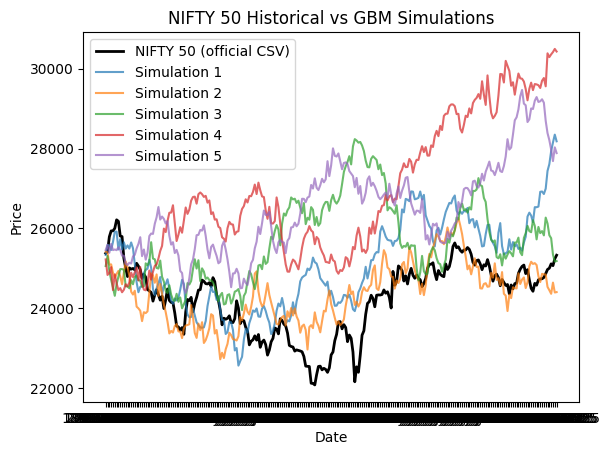

In [ ]:
n_simulations=5
start_price=prices.iloc[0]
n_steps=len(prices)
time=1
dT=time/n_steps
plt.plot(dates,prices,label="NIFTY 50 (official CSV)",color='black',linewidth=2)
for i in range(n_simulations):
  Z=np.random.normal(0,1,n_steps)
  increments=(mu_annual-(0.5*(sigma_annual**2)))*dT+(sigma_annual*np.sqrt(dT)*Z)
  log_path=np.cumsum(increments)
  path=start_price*np.exp(log_path)
  plt.plot(dates,path,alpha=0.7,label=f"Simulation {i+1}")
plt.title("NIFTY 50 Historical vs GBM Simulations")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()